In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# print(tf.__version__)

In [2]:
observationSize = 1000
xs = np.random.uniform(-10,10,(observationSize,1))
zs = np.random.uniform(-10,10,(observationSize,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observationSize,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

<h3>Solving with TensorFlow</h3>

In [3]:
training_data = np.load('TF_intro.npz')

In [ ]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
            tf.keras.layers.Dense(output_size,
                                 kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
##Loss functions can be adjusted(Customized) but it's harder and not always worth the trouble
model.compile(optimizer=custom_optimizer,loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'],epochs = 1000,verbose=0)
#Epoch = iteration over the full dataset.

## Extract the weights and bias


In [22]:
model.layers[0].get_weights()

[array([[ 2.0537395],
        [-2.9291437]], dtype=float32),
 array([3.7037334], dtype=float32)]

In [9]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0085318],
       [-3.0232189]], dtype=float32)

In [10]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9961205], dtype=float32)

## Extract the outputs (make predictions)

In [12]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-29.2],
       [ 29.7],
       [-30.6],
       [ 24.1],
       [ 27.8],
       [-16.2],
       [ 13.2],
       [  2.3],
       [ 33.1],
       [-38. ],
       [ 25.4],
       [-23.2],
       [  3.9],
       [ -4.8],
       [ 10. ],
       [  1.8],
       [ -4.7],
       [-15.8],
       [ 21.5],
       [ 28.9],
       [ -7. ],
       [  2.1],
       [ 26.5],
       [ 43.3],
       [ 16.3],
       [-10.6],
       [-32.7],
       [ 18.3],
       [-34.8],
       [ 38.7],
       [ -9.6],
       [  9.2],
       [ 37.3],
       [  4.9],
       [ 22.4],
       [-16.4],
       [ -4. ],
       [-28.9],
       [  5.1],
       [-13.4],
       [ 24.7],
       [-15.9],
       [  4.6],
       [  2.1],
       [ 13.5],
       [  2. ],
       [ 24.6],
       [ -2.6],
       [  9.4],
       [-22. ],
       [ 40.7],
       [ 17.1],
       [-13.9],
       [-15.8],
       [ 24.6],
       [  9.1],
       [ 15.4],
       [ 45.4],
       [ 12.9],
       [ 31.2],
       [-15.2],
       [ 20.5],
       [

In [13]:
training_data['targets'].round(1)

array([[-29.9],
       [ 28.9],
       [-30.7],
       [ 23.6],
       [ 27.2],
       [-15.4],
       [ 12.3],
       [  3.2],
       [ 32.8],
       [-38.2],
       [ 25. ],
       [-23.5],
       [  3.4],
       [ -5.3],
       [  9.5],
       [  2.4],
       [ -5.3],
       [-14.8],
       [ 22.1],
       [ 29.1],
       [ -6. ],
       [  1.7],
       [ 27.1],
       [ 43.4],
       [ 16.6],
       [-10.1],
       [-32.5],
       [ 18.2],
       [-33.7],
       [ 38.4],
       [ -8.7],
       [ 10. ],
       [ 36.4],
       [  4.8],
       [ 21.5],
       [-16.6],
       [ -4.1],
       [-29.6],
       [  6. ],
       [-12.6],
       [ 25.1],
       [-16. ],
       [  4.8],
       [  2.3],
       [ 14.1],
       [  2.9],
       [ 24.7],
       [ -2. ],
       [  9. ],
       [-20.9],
       [ 40.3],
       [ 17.6],
       [-13.3],
       [-14.8],
       [ 25.1],
       [  9.2],
       [ 16.1],
       [ 45.2],
       [ 12.7],
       [ 30.9],
       [-15.3],
       [ 20.2],
       [

## Plotting the data

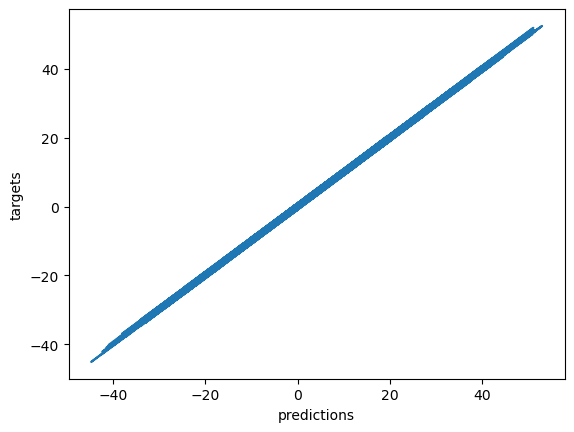

In [14]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs']).round(1)),np.squeeze(training_data['targets']))
plt.xlabel('predictions')
plt.ylabel('targets')
plt.show()